In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
%matplotlib inline

In [2]:
def centerSpines(ax, xmax, ymax):
    """Making 2D plots look better"""
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.set_aspect('equal', adjustable='box')    
    ax.set_xlim(-xmax,xmax)
    ax.set_ylim(-ymax,ymax)


In [3]:
print(plt.style.available)

['seaborn-paper', 'seaborn-bright', 'seaborn', 'grayscale', 'dark_background', 'seaborn-ticks', 'seaborn-deep', 'bmh', 'seaborn-talk', 'seaborn-darkgrid', 'ggplot', 'classic', 'seaborn-dark', 'seaborn-colorblind', 'seaborn-poster', 'fivethirtyeight', 'seaborn-muted', 'seaborn-white', 'seaborn-dark-palette', 'seaborn-notebook', 'seaborn-pastel', 'seaborn-whitegrid']


# Vectors, Matrices, Transformations, Factorizations

This notebook illustrates some of the key concepts, results and techniques that culminate in the development of two interesting factorizations of matrices: **Eigen decomposition** and **Singular value decomposition**.

Recall that a **basis** is a **linearly independent** collection of vectors: $v_1, v_2, \ldots, v_n$ form a basis iff no vector among them can be expressed as linear combination of the remaining vectors. For example, the vectors $v_1=[3,2]^T$ and $v_2=[1,3]^T$ shown below are linearly independent in two dimensions:

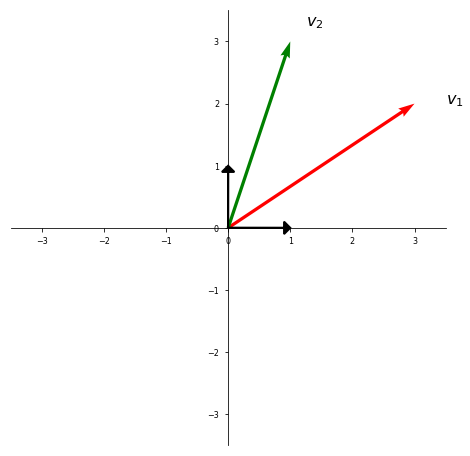

In [4]:
v1 = np.array([3,2])
v2 = np.array([1,3])
x = [0.0, 0.0]
y = [0.0, 0.0]
xv = [3, 1]
yv = [2, 3]

plt.figure(figsize=(15,8))
ax = plt.gca()
centerSpines(ax, 3.5, 3.5)
ax.quiver(x,y,xv,yv,color='rg', angles='xy',scale_units='xy',scale=1)
ax.arrow(0,0,1,0,head_width=0.2, head_length=0.1, fc='k', ec='k',linewidth=2,
        length_includes_head=True)
ax.arrow(0,0,0,1,head_width=0.2, head_length=0.1, fc='k', ec='k', linewidth=2,
        length_includes_head=True)
plt.annotate(r'$v_1$', xy=(3,2), xycoords='data', xytext=(3.5, 2), fontsize=16)
plt.annotate(r'$v_2$', xy=(1,3), xycoords='data', xytext=(1.25, 3.25), fontsize=16)

plt.show()

The so-called **standard** basis is the familiar system of $n$-dimensional axes vectors with each axis vector only having a non-zero component in its axis dimension: they have the further advantage of being **orthogonal** (or *perpendicular*) to one another. 

It is always convenient to work with an **orthonormal basis**, viz. a collection of mutually orthogonal *unit* vectors, e.g. the $x$ and $y$ unit vectors along the axes pictured above. The **Gram-Schmidt orthonormalization process** is a convenient way to obtain such a collection.

## Gram-Schmidt Orthonormalization

From a set of $k \leq n$ *independent* vectors in $n$-space:

$$v_1, v_2, \ldots, v_k$$

we wish to construct an **orthonormal** collection of vectors

$$w_1, w_2, \ldots, w_k$$.

This can be done by following a simple iterative sequence of projection + normalization operations: we will illustrate it using our vectors $v_1$ and $v_2$ shown above.

### Normalize $v_1$

* Start by obtaining the unit vector $w_1 = \frac{v_1}{\| v_1 \|}$ in the direction of $v_1$. 

Recall that $\| v_1 \|^2 = v_1 \cdot v_1 = v_1^T v_1$. In our case, $\| v_1 \|$ = $\sqrt{13}$.

In [5]:
w1 = v1/np.sqrt(v1.dot(v1))


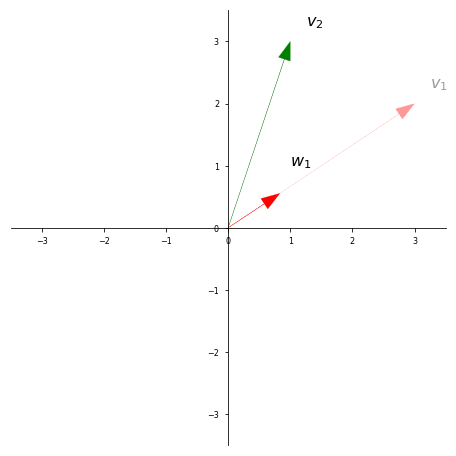

In [6]:
plt.figure(figsize=(15,8))
ax = plt.gca()
centerSpines(ax,3.5,3.5)
ax.arrow(0,0,w1[0],w1[1],head_width=0.2, head_length=0.3, fc='r', ec='r',
        length_includes_head=True)
ax.arrow(0,0,v2[0],v2[1],head_width=0.2, head_length=0.3, fc='g', ec='g',
        length_includes_head=True)
ax.arrow(0,0,v1[0],v1[1],head_width=0.2, head_length=0.3, fc='r', ec='r', 
         alpha=0.4, ls='dotted', length_includes_head=True)

# ax.quiver(x,y,xv,yv,color='rg', angles='xy',scale_units='xy',scale=1)
plt.annotate(r'$w_1$', xy=(1,1), xycoords='data', xytext=(1, 1), fontsize=16)
plt.annotate(r'$v_2$', xy=(1,3), xycoords='data', xytext=(1.25, 3.25), fontsize=16)
plt.annotate(r'$v_1$', xy=(3,2), xycoords='data', xytext=(3.25, 2.25), 
             alpha = 0.4, fontsize=16)
plt.show()

* Use $v_2$ to find a vector that is orthogonal to $w_1$. First compute the **projection** of $v_2$ onto $w_1$:
$$p = (v_2 \cdot w_1) w_1$$
Then, subtract $p$ from $v_2$:
$$z_2 = v_2 - (v_2 \cdot w_1) w_1$$

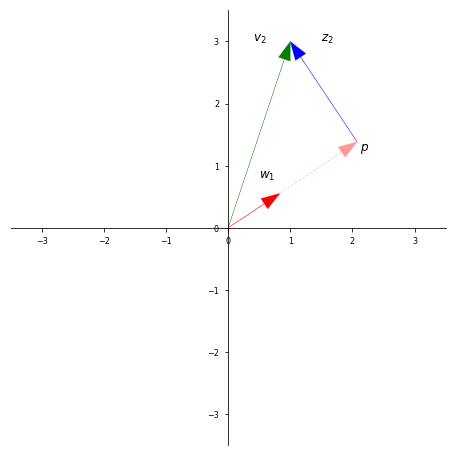

In [7]:
proj = v2.dot(w1) * w1
z2 = v2 - proj

plt.figure(figsize=(15,8))
ax = plt.gca()
centerSpines(ax,3.5,3.5)
ax.arrow(0,0,w1[0],w1[1],head_width=0.2, head_length=0.3, fc='r', ec='r',
         length_includes_head=True)
ax.arrow(0,0,v2[0],v2[1],head_width=0.2, head_length=0.3, fc='g', ec='g', 
         length_includes_head=True)
ax.arrow(0,0,proj[0],proj[1],head_width=0.2, head_length=0.3, fc='r', ec='r', 
         alpha=0.4, ls='dotted',length_includes_head=True)
ax.arrow(proj[0],proj[1],z2[0],z2[1],head_width=0.2, head_length=0.3, fc='b', ec='b', 
         length_includes_head=True)
plt.annotate(r'$w_1$', xy=(1,1), xycoords='data', xytext=(0.5, 0.8), fontsize=12)
plt.annotate(r'$v_2$', xy=(1,3), xycoords='data', xytext=(0.4, 3), fontsize=12)
plt.annotate(r'$p$', xy=(proj[0],proj[1]), xycoords='data', 
             xytext=(proj[0]+0.05, proj[1]-0.15), fontsize=12)
plt.annotate(r'$z_2$', xy=(v2[0], v2[1]), xycoords='data', xytext=(v2[0]+.5, v2[1]), 
             fontsize=12)
plt.show()

Note that $z_2$ is indeed perpendicular to $w_1$ since $w_1$ is a unit vector:

\begin{eqnarray*}
z_2 \cdot w_1 & = & (v_2 - (v_2 \cdot w_1) w_1) \cdot w_1 \\
 & = & (v_2 \cdot w_1) - (v_2 \cdot w_1) (w_1 \cdot w_1) \\
 & = & (v_2 \cdot w_1) - (v_2 \cdot w_1) \\
 & = & 0
\end{eqnarray*}

* Normalize vector $z_2$ to obtain $w_2 = \frac{z_2}{\| z_2 \|}$. 

It is easy to check that $w_2$ is a unit vector that is orthogonal to $w_1$: together they form an orthonormal basis.

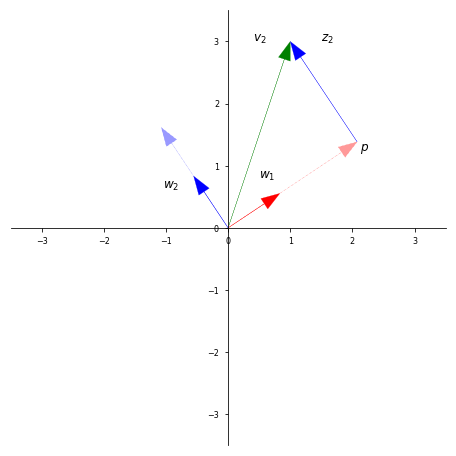

In [8]:
w2 = z2/np.sqrt(z2.dot(z2))
plt.figure(figsize=(15,8))
ax = plt.gca()
centerSpines(ax,3.5,3.5)
ax.arrow(0,0,w1[0],w1[1],head_width=0.2, head_length=0.3, fc='r', ec='r',
         length_includes_head=True)
ax.arrow(0,0,v2[0],v2[1],head_width=0.2, head_length=0.3, fc='g', ec='g', 
         length_includes_head=True)
ax.arrow(0,0,proj[0],proj[1],head_width=0.2, head_length=0.3, fc='r', ec='r', 
         alpha=0.4, ls='dotted',length_includes_head=True)
ax.arrow(proj[0],proj[1],z2[0],z2[1],head_width=0.2, head_length=0.3, fc='b', ec='b', 
         length_includes_head=True)
ax.arrow(0,0,z2[0],z2[1],head_width=0.2, head_length=0.3, fc='b', ec='b', 
         alpha=0.4, ls='dotted', length_includes_head=True)
ax.arrow(0,0,w2[0],w2[1],head_width=0.2, head_length=0.3, fc='b', ec='b', 
         length_includes_head=True)

plt.annotate(r'$w_1$', xy=(1,1), xycoords='data', xytext=(0.5, 0.8), fontsize=12)
plt.annotate(r'$v_2$', xy=(1,3), xycoords='data', xytext=(0.4, 3), fontsize=12)
plt.annotate(r'$p$', xy=(proj[0],proj[1]), xycoords='data', 
             xytext=(proj[0]+0.05, proj[1]-0.15), fontsize=12)
plt.annotate(r'$z_2$', xy=(v2[0], v2[1]), xycoords='data', xytext=(v2[0]+.5, v2[1]), 
             fontsize=12)
plt.annotate(r'$w_2$', xy=(w2[0], w2[1]), xycoords='data', xytext=(w2[0]-0.5, w2[1]-0.2), 
             fontsize=12)
plt.show()

This process can be generalized easily. Having already constructed the orthonormal collection $w_1,w_2,\ldots,w_{k-1}$, we use $v_k$ to find a vector orthogonal to each one of these unit vectors by subtracting from $v_k$ its successive projections onto $w_1$, then $w_2$ and so on until $w_{k-1}$. 
Normalizing this new vector yields the next orthonormal basis vector $w_k$.




## Matrix multiplication as a transformation

Let $M$ be an $m \times n$ matrix with real entries. The key observation is that a vector in $n$-space (the **row space** of $M$) gets transformed to a vector in $m$-space (the **column space** of $M$) as a result of **left multiplication** by $M$. For example, consider:

$$
M = \begin{bmatrix}
2 & -3 \\
-1 & 2
\end{bmatrix}
$$
Then, the vectors $v_1=[1, 1]^T$ and $v_2=[-1,1]^T$ are transformed to the vectors $M v_1 = [-1, 1]^T$ and $M v_2 = [-5,3]^T$ respectively. In our example, both the row space and column space are $\mathbb{R}^2$ spaces but in general, they could have different dimensions; we stick with two dimensions for ease of visualization.



In [ ]:
m = np.array([[2,-3],[-1,2]])
v1 = np.array([1,1])
v2 = np.array([-1,1])
mv1 = m.dot(v1)
mv2 = m.dot(v2)

In [ ]:
fig = plt.figure(figsize=(15,8))

plt.subplot(121)
ax = plt.gca()
centerSpines(ax,5.5,5.5)
ax.arrow(0,0,v1[0],v1[1],head_width=0.1, head_length=0.2, fc='r', ec='r',
         length_includes_head=True, linewidth=1.5)
ax.arrow(0,0,v2[0],v2[1],head_width=0.1, head_length=0.2, fc='g', ec='g', 
         length_includes_head=True, linewidth=1.5)
plt.annotate(r'$v_1$', xy=(v1[0],v1[1]), xycoords='data', 
             xytext=(v1[0]+0.25, v1[1]+0.25), fontsize=12)
plt.annotate(r'$v_2$', xy=(v2[0],v2[1]), xycoords='data', 
             xytext=(v2[0]+0.25, v2[1]+0.25), fontsize=12)

plt.subplot(122)
ax = plt.gca()
centerSpines(ax,5.5,5.5)
ax.arrow(0,0,mv1[0],mv1[1],head_width=0.1, head_length=0.2, fc='r', ec='r',
         length_includes_head=True, linewidth=1.5)
ax.arrow(0,0,mv2[0],mv2[1],head_width=0.1, head_length=0.2, fc='g', ec='g', 
         length_includes_head=True, linewidth=1.5)
plt.annotate(r'$Mv_1$', xy=(mv1[0],mv1[1]), xycoords='data', 
             xytext=(mv1[0]+0.25, mv1[1]+0.25), fontsize=12)
plt.annotate(r'$Mv_2$', xy=(mv2[0],mv2[1]), xycoords='data', 
             xytext=(mv2[0]+0.25, mv2[1]+0.25), fontsize=12)

fig.subplots_adjust(hspace=10)
plt.show()

## Eigenvalues and Eigenvectors

Once matrices are viewed as linear transformations, a natural question can be asked of matrices with the same row and column spaces. Do there exist vectors that are transformed by the matrix to *scaled versions of themselves*? Such vectors are called **eigenvectors** and the scale factors are called **eigenvalues**; without loss of generality, we can assume that the eigenvectors are unit vectors. Algebraically, we are looking for solutions $x$ to the **eigen-equation**:

$$M x = \lambda x$$

with any pair $(\lambda, x)$ that satifies the equation (such a pair is called an **eigen-pair**). 

We can show that our example matrix $M$ has two eigenpairs
$$\left(2 + \sqrt{3}, ~\begin{bmatrix} -\sqrt{3}/2 \\ 1/2 \end{bmatrix}\right), ~~
\left(2 - \sqrt{3}, ~\begin{bmatrix} \sqrt{3}/2 \\ 1/2 \end{bmatrix}\right)$$.

This naturally produces an **eigen-decomposition** for $M$. Let $V$ be the matrix whose columns are orthogonal unit eigenvectors of $M$. Then, we have

$$M V = V \Lambda$$

where $\Lambda$ is the **diagonal** matrix of the associated eigenvalues. For our example:

$$\begin{bmatrix}
2 & -3 \\
-1 & 2
\end{bmatrix}
\begin{bmatrix}
-\sqrt{3}/2 & \sqrt{3}/2 \\
1/2 & 1/2 
\end{bmatrix} = 
\begin{bmatrix}
-\sqrt{3}/2 & \sqrt{3}/2 \\
1/2 & 1/2 
\end{bmatrix}
\begin{bmatrix}
2 + \sqrt{3} & 0 \\
0 & 2 - \sqrt{3}
\end{bmatrix}
$$

As a decomposition, we can then write:

$$M = V \Lambda V^{-1}$$

and we will see later that when $V$ happens to be a not merely an orthonormal matrix but also an orthonormal **basis**, then $V^{-1} = V^T$ and the decomposition takes the special form:

$$M = V \Lambda V^{T}$$



In [ ]:
lam1 = 2 + np.sqrt(3)
lam2 = 2 - np.sqrt(3)
v1 = np.array([-np.sqrt(3)/2, 1/2])
v2 = np.array([np.sqrt(3)/2, 1/2])
mv1 = m.dot(v1)
mv2 = m.dot(v2)

plt.figure(figsize=(20,10))
ax = plt.gca()
centerSpines(ax,3.5,3.5)
ax.arrow(0,0,v1[0],v1[1],head_width=0.1, head_length=0.2, fc='r', ec='r',
         length_includes_head=True)
ax.arrow(0,0,v2[0],v2[1],head_width=0.1, head_length=0.2, fc='g', ec='g', 
         length_includes_head=True)
ax.arrow(0,0,mv1[0],mv1[1],head_width=0.1, head_length=0.2, fc='r', ec='r', 
         alpha=0.4, ls='dotted',length_includes_head=True, linewidth=1.5)
ax.arrow(0,0,mv2[0],mv2[1],head_width=0.1, head_length=0.2, fc='g', ec='g', 
         alpha=0.4, ls='dotted', length_includes_head=True, linewidth=1.5)
plt.annotate(r'$v_1$', xy=(v1[0],v1[1]), xycoords='data', 
             xytext=(v1[0], v1[1]+0.1), fontsize=12)
plt.annotate(r'$v_2$', xy=(v2[0],v2[1]), xycoords='data', 
             xytext=(v2[0], v2[1]), fontsize=12)
plt.annotate(r'$Mv_1$', xy=(mv1[0],mv1[1]), xycoords='data', 
             xytext=(mv1[0]+0.1, mv1[1]+0.1), fontsize=12)
plt.annotate(r'$Mv_2$', xy=(mv2[0],mv2[1]), xycoords='data', 
             xytext=(mv2[0]-0.25, mv2[1]+0.1), fontsize=12)
plt.show()

Note that, in general, the solutions to the eigen-equation can yield complex-valued eigen-values but hey will occur in *conjugate pairs*. Also note that in the example above, the eigen-vectors were **not orthogonal** to each other!

## Action of a diagonal matrix

If $D$ is a diagonal matrix, then it's action on a vector is simply to **scale** each dimension of the vector by the corresponding scalar along $M$'s diagonal. For example, when 
$$D = \begin{bmatrix} 3 & 0 \\ 0 & 1 \end{bmatrix}$$
it stretches the $x$ coordinate by a factor of $3$ and keeps the $y$ coordinate intact. Visually:

In [ ]:
fig = plt.figure(figsize=(15,8))

plt.subplot(121)
ax = plt.gca()
centerSpines(ax,3,3)
ax.arrow(0,0,1,0,head_width=0.1, head_length=0.2, fc='r', ec='r',
         length_includes_head=True, linewidth=1.5)
ax.arrow(0,0,0,1,head_width=0.1, head_length=0.2, fc='r', ec='r', 
         length_includes_head=True, linewidth=1.5)
points = [[1,0],[1,1],[0,1],[0,0]]
square = plt.Polygon(points, fc='r', alpha=0.3)
ax.add_patch(square)

plt.subplot(122)
ax = plt.gca()
centerSpines(ax,3,3)
ax.arrow(0,0,3,0,head_width=0.1, head_length=0.2, fc='b', ec='b',
         length_includes_head=True, linewidth=1.5)
ax.arrow(0,0,0,1,head_width=0.1, head_length=0.2, fc='b', ec='b', 
         length_includes_head=True, linewidth=1.5)
points = [[3,0],[3,1],[0,1],[0,0]]
rect = plt.Polygon(points, alpha=0.3)
ax.add_patch(rect)

fig.subplots_adjust(hspace=10)
plt.show()

## Action of a symmetric matrix

Consider the symmetric matrix:
$$A = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$$

Its action can be visualized by plotting how it transforms points on a unit square bounded by two **orthonormal basis vectors** (in mathematical terms, the unit square is the set of affine combinations of the basis vectors with multiples $\leq 1$).


In [ ]:
fig = plt.figure(figsize=(15,8))

v1 = np.array([1,0])
v2 = np.array([0,1])
plt.subplot(121)
ax = plt.gca()
centerSpines(ax,3,3)
ax.arrow(0,0,1,0,head_width=0.1, head_length=0.2, fc='r', ec='r',
         length_includes_head=True, linewidth=1.5)
ax.arrow(0,0,0,1,head_width=0.1, head_length=0.2, fc='r', ec='r', 
         length_includes_head=True, linewidth=1.5)
points = [[1,0],[1,1],[0,1],[0,0]]
square = plt.Polygon(points, fc='r', alpha=0.3)
ax.add_patch(square)

m = np.array([[2,1],[1,2]])
mv1 = m.dot(v1)
mv2 = m.dot(v2)

plt.subplot(122)
ax = plt.gca()
centerSpines(ax,3,3)
ax.arrow(0,0,mv1[0],mv1[1],head_width=0.1, head_length=0.2, fc='b', ec='b',
         length_includes_head=True, linewidth=1.5)
ax.arrow(0,0,mv2[0],mv2[1],head_width=0.1, head_length=0.2, fc='b', ec='b', 
         length_includes_head=True, linewidth=1.5)
l_v1 = list(v1)
l_v2 = list(v2)
points = [list(mv1), list(mv1+mv2), list(mv2),[0,0]]
rect = plt.Polygon(points, alpha=0.3)
ax.add_patch(rect)

fig.subplots_adjust(hspace=10)
plt.show()

So, the square bounded by the standard basis vectors is *sheared and rotated* by the transformation. If we **rotate** the basis vectors and observe the image of the resulting rotated square when transformed by $M$, we begin to see something interesting. Consider what happens when the angle of rotation is $45$ degrees:

In [ ]:
def rotate(vector, theta):
    """Return the vector after rotation through an angle
    
    vector: an 2-dimensional vector
    theta: rotation angle in radians"""
    rotMatrix = np.array([[np.cos(theta), -np.sin(theta)], 
                         [np.sin(theta),  np.cos(theta)]])
    return rotMatrix.dot(vector)


In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
ax = plt.gca()
theta = np.pi*45/180
u1 = rotate(v1, theta)
u2 = rotate(v2, theta)
centerSpines(ax,4,4)
ax.arrow(0,0,u1[0],u1[1],head_width=0.1, head_length=0.2, fc='r', ec='r',
        length_includes_head=True, linewidth=1.5, alpha=0.4)
ax.arrow(0,0,u2[0],u2[1],head_width=0.1, head_length=0.2, fc='r', ec='r', 
        length_includes_head=True, linewidth=1.5, alpha=0.4)
points = [list(u1), list(u1+u2), list(u2),[0,0]]
rsq = plt.Polygon(points, fc='r', alpha=0.3)
ax.add_patch(rsq)
    
plt.subplot(122)
ax = plt.gca()
centerSpines(ax,4,4)
mu1 = m.dot(u1)
mu2 = m.dot(u2)
ax.arrow(0,0,mu1[0],mu1[1],head_width=0.1, head_length=0.2, fc='b', ec='b',
        length_includes_head=True, linewidth=1.5, alpha=0.4)
ax.arrow(0,0,mu2[0],mu2[1],head_width=0.1, head_length=0.2, fc='b', ec='b', 
        length_includes_head=True, linewidth=1.5, alpha=0.4)
points = [list(mu1), list(mu1+mu2), list(mu2),[0,0]]
rsq_image = plt.Polygon(points, fc='b', alpha=0.3)
ax.add_patch(rsq_image) 

fig.subplots_adjust(hspace=10)
plt.show()

The crucial thing to notice is that **an orthogonal basis** is transformed to another **othogonal basis** that is merely stretched like one would expect from a *diagonal matrix*. In other words, a symmetric matrix behaves just like a diagonal matrix after an appropriate rotation in row space.  

Now consider the distinct eigen-pairs $(\lambda_1, v_1)$ and $(\lambda_2, v_2)$ of $A$.  Because $A$ is symmetric: 

* The eigenvectors are orthogonal. 

\begin{eqnarray*}
v_2^T A v_1 & = & v_2^T \lambda_1 v_1 \\
 & = & \lambda_1 (v_2 \cdot v_1)
\end{eqnarray*}

but also:

\begin{eqnarray*}
v_2^T A v_1 & = & v_2^T A^T v_1 \\
 & = & (A v_2)^T v_1 \\
 & = & (\lambda_2 v_2)^T v_1 \\
 & = & \lambda_2 (v_2 \cdot v_1)
\end{eqnarray*}

But $\lambda_1 \not= \lambda_2$, hence it must be the case that $v_2 \cdot v_1 = 0$. 

* The eigenvalues are real (we won't prove this here!)

Put together, what this this means is that the mysterious rotation in row space merely correspoponds to the orthonormal basis given by the eigenvectors $v_1$ and $v_2$, and the transformed basis contains the orthogonal vectors $\lambda_1 v_1$ and $\lambda_2 v_2$, so the $\lambda$s are acting like a diagonal matrix transformation after the rotation!

You can verify that $A$ has eigenpairs 
$$\left(1, \begin{bmatrix} -\sqrt{2}/2 \\ \sqrt{2}/2 \end{bmatrix} \right)$ \mathrm{~and~} \left(3, \begin{bmatrix} \sqrt{2}/2 \\ \sqrt{2}/2 \end{bmatrix} \right)$$ 

which accounts for the stretches by factors of $1$ and $3$ along the rotated axes.



## The symmetric matrices $M^T M$ and $M M^T$ 

For any matrix $M$, it is straightforward to show that both $M^T M$ and $M M^T$ are symmetric. Moreover, these two matrices have the **same eigenvalues**: $M^T M v = \lambda v$ implies that 
$M (M^T M v) = \lambda (Mv)$. But, we simultaneously have:

\begin{eqnarray*}
M (M^T M v) & = & (M M^T) (Mv) \\
 & = & \lambda (Mv)
\end{eqnarray*}

In other words, every eigen-pair $(\lambda, v)$ of $M^T M$ corresponds to the eigen-pair $(\lambda, Mv)$ of $MM^T$.

But something more is true: both $M^T M$ and $M M^T$ are **positive semi-definite**, i.e. their eigenvalues are not just real but **non-negative real** numbers! For any vector $v$:

\begin{eqnarray*}
v^T (M^T M) v & = & (v^T M^T) (Mv) \\
 & = & (Mv)^T (Mv) \\
 & = & Mv \cdot Mv \\
 & \geq & 0
\end{eqnarray*}

which means that any solution of the eigen-equation $(M^T M) v = \lambda v$ must satisfy $\lambda \geq 0$. 

## Singular Value Decomposition

Consolidating what we know: for *any* matrix $M$: 

* $M^T M$ and $M M^T$ are symmetric, positive semi-definite and hence have non-negative eigenvalues with the eigen-vectors forming orthonormal bases $V$ and $U$ respectively.

* If $\Lambda$ is the diagonal matrix of (non-negative) eigen-values of $M^T M$, then $$(M^T M) V = V \Lambda$$ is the eigen-equation for $M^T M$, and $$(M M^T) U = U \Lambda$$ is the eigen-equation for $MM^T$. It is customary to organize the diaginal matrix $\Lambda$ so that the eigen-values are in non-increasing order. Note that while we have not discussed **rank**, it is the case that the number of positive eigen-values of $M^T M$ equals the rank of $M$ (which is also the rank of $M^T M$). So, some of the last eigen-values in non-incerasing order may be zeroes.

### Definition of $\Sigma$

Consider the **diagonal matrix** $$\Sigma = \sqrt{\Lambda}$$ where the $i^{th}$ diagonal entry $\sigma_i$ in $\Sigma$ equals the **square root** of the corresponding non-negative diagonal entry $\lambda_i$ in $\Lambda$. The $\sigma$ values are called **singular values** of $M$: these are uniquely defined from the eigen-values of $M^T M$ by taking their square-roots!

Then, the **singular value decomposition** of $M$ is given by:

$$\mathbf{M = U \Sigma V^T}$$

where $U$ and $V$ are orthonormal matrices (i.e. their columns are orthogonal, unit vectors) and $\Sigma$ is a non-negative diagonal matrix. Note that $U$ and $V$ are related by the equation: $U \Sigma = M V$. 

## Sanity Check

Recall that the columns of $V$ (respectively $U$) are orthogonal, unit vectors **because they are eigen-vectors of a symmetric matrix**. This means that $V^T V = V V^T = I$, the identity matrix (likewise, $U^T U = U U^T = I$). Hence:

\begin{eqnarray*}
(M^T M) V & = & (U \Sigma V^T)^T (U \Sigma V^T) V \\
 & = & V \Sigma^T (U^T U) \Sigma (V^T V) \\
 & = & V \Sigma^2 \\
 & = & V \Lambda
\end{eqnarray*}

which is our familiar eigen-equation for $M^T M$!

It is not difficult to see the factorization is **unique** since the eigen-pairs of $M^T M$ are uniquely defined. 


### Visualization

Let's see an example to understand how the action of a matrix $M$ can be understood through its singular value decomposition. 

In [ ]:
m = np.array([[2,1],[-1,1]])
mTm = m.T.dot(m)   # M^T M
mmT = m.dot(m.T)
print(mTm)
print(mmT)

In [ ]:
u, sigma, vT = np.linalg.svd(m)
print(u)
print(sigma)
print(vT.T)

In [ ]:
v1 = vT[0,:]
v2 = vT[1,:]
u1 = u[:,0]
u2 = u[:,1]

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
ax = plt.gca()
centerSpines(ax,3,3)
ax.arrow(0,0,vT[0,0],vT[0,1],head_width=0.1, head_length=0.2, fc='r', ec='r',
        length_includes_head=True, linewidth=1.5, alpha=0.4)
ax.arrow(0,0,vT[1,0],vT[1,1],head_width=0.1, head_length=0.2, fc='r', ec='r', 
        length_includes_head=True, linewidth=1.5, alpha=0.4)
points = [list(vT[0,:]), list(vT[0,:]+vT[1,:]), list(vT[1,:]),[0,0]]
rsq = plt.Polygon(points, fc='r', alpha=0.3)
ax.add_patch(rsq)
plt.annotate(r'$v_1$', xy=(v1[0],v1[1]), xycoords='data', 
             xytext=(v1[0], v1[1]-0.2), fontsize=12)
plt.annotate(r'$v_2$', xy=(v2[0],v2[1]), xycoords='data', 
             xytext=(v2[0]-0.2, v2[1]+0.1), fontsize=12)
    
z0 = u[:,0]*sigma[0]
z1 = u[:,1]*sigma[1]
    
plt.subplot(122)
ax = plt.gca()
centerSpines(ax,4,4)
ax.arrow(0,0,u[0,0],u[1,0],head_width=0.1, head_length=0.2, fc='k', ec='k',
        length_includes_head=True, linewidth=2, alpha=0.3)
ax.arrow(0,0,u[0,1],u[1,1],head_width=0.1, head_length=0.2, fc='b', ec='b', 
        length_includes_head=True, linewidth=2, alpha=0.3)
ax.arrow(0,0,z0[0],z0[1],head_width=0.1, head_length=0.2, fc='b', ec='b',
        length_includes_head=True, linewidth=1.5, alpha=0.4)
ax.arrow(0,0,z1[0],z1[1],head_width=0.1, head_length=0.2, fc='b', ec='b', 
        length_includes_head=True, linewidth=1.5, alpha=0.4)
points = [list(z0), list(z0+z1), list(z1),[0,0]]
rsq_image = plt.Polygon(points, fc='b', alpha=0.3)
ax.add_patch(rsq_image)
plt.annotate(r'$u_1$', xy=(u[0,0],u[1,0]), xycoords='data', 
             xytext=(u[0,0]+0.1, u[1,0]+0.1), fontsize=12)
plt.annotate(r'$u_2$', xy=(u[0,1],u[1,1]), xycoords='data', 
             xytext=(u[0,1]+0.05, u[1,1]-0.25), fontsize=12)
plt.annotate(r'$Mv_1$', xy=(z0[0],z0[1]), xycoords='data', 
             xytext=(z0[0]+0.1, z0[1]+0.1), fontsize=12)
plt.annotate(r'$Mv_2$', xy=(z1[0],z1[1]), xycoords='data', 
             xytext=(z1[0]-0.25, z1[1]+0.1), fontsize=12)

fig.subplots_adjust(hspace=10)
plt.show()

In other words, the SVD $M=U \Sigma V^T$ tells us that there is a orthonormal basis $V$ in row space that gets transformed to an orthonormal basis $U$ in column space but with each axis stretched/shrunk by a factor given by the corresponding singular value for that axis!

This means that the action of $M$ on a vector $v$ can be visualized as:

* a rotation in row space 

* a projection to column space that stretches/shrinks each component by the corresponding singular values.

* a inverse rotation in column space.


### References

Here is an excellent article that provides a nice exposition of the intuition behind singular value decomposition:

http://www.ams.org/samplings/feature-column/fcarc-svd

It also has an example of image compression using singular value decomposition. 

Another wonderful expository article on SVD (with all the necessary theory) 

http://www-users.math.umn.edu/~lerman/math5467/svd.pdf

has further applications. One in particular that I like is the use of SVD to solve for linear regression coefficients by minimizing root mean square distances to the regression hyperplane. One can solve it using pseudo-inverses but as the article explains, that is numerically very unstable and better results are obtained by using SVDs which reduce the problem in the end to a ridiculously simple elimination. 